# Lecure 7.1 More data analysis with pandas

We are focusing on coding today. Make sure you ask for help when you get stuck, either from the intructor or your colleagues. A little bit of struggle is good, but don't bang your head against the wall!

Data analysis is a proccess of interaction with data, getting to know it, using descriptive statistics, seeing how variables are related. Once you get to know the data, then creative and interesting things can happen that bring new insight and help you develop a narrative about the data you are analysing

## 1. Warm up

### 1.1 
Code a function that given the area of a circle, returns both the radius and the circumference
### 1.2 
Add in an error statement if a negative area is passed to the function
### 1.3 
Use your function to plot radus and circumference for areas between 0 and 1000, counting by 20. Put both lines on one plot. Label your plot, and include a legend.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [98]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

### 1.1 Sol

In [13]:
# first check the formula:
area = np.pi*4**2
area

50.26548245743669

In [14]:
np.sqrt(area/np.pi) #looks good

4.0

In [26]:
# the area of a circle is pi*r^2
# r = sqrt(area/pi) 
# C = 2*pi*r
def my_func(area):
    """ Given an area of a circle, return the radius and circumference  
    Assumes numpy has been imported """ # this is a documentation string, split over two lines
    r = np.sqrt(area/np.pi)
    C = 2*np.pi*r
    return r,C
    

In [27]:
# check doc string
my_func?

Signature: my_func(area)
Docstring:
Given an area of a circle, return the radius and circumference  
assumes numpy has been imported 
File:      ~/Documents/Teaching/Intro_computing/Fall_2019/<ipython-input-26-aee6486acf0b>
Type:      function


In [28]:
# check function
my_r, my_C = my_func(area)
print(my_r)
print(my_C)

# looks good

4.0
25.132741228718345


### 1.2 Sol

In [34]:
# First try:

# add in an error message
# the area of a circle is pi*r^2
# r = sqrt(area/pi) 
# C = 2*pi*r
def my_func(area):
    """ Given an area of a circle, return the radius and circumference  
    Assumes numpy has been imported """ # this is a documentation string, split over two lines
    if area <0:
        print("Area must be positive, exiting")
        return
    r = np.sqrt(area/np.pi)
    C = 2*np.pi*r
    return r,C

In [35]:
# check error message
my_func(-20)

Area must be positive, exiting


In [53]:
# Second try, modified to handle arrays as arguments:

# add in an error message
# the area of a circle is pi*r^2
# r = sqrt(area/pi) 
# C = 2*pi*r
def my_func(area):
    """ Given an area of a circle, return the radius and circumference  
    Assumes numpy has been imported """ # this is a documentation string, split over two lines
    area = np.array(area) # need to change to an array for my logical to work below
    if np.sum(area <0)!=0:
        print("Area must be positive, exiting")
        return
    r = np.sqrt(area/np.pi)
    C = 2*np.pi*r
    return r,C

In [56]:
areas = [-10,2] 

In [57]:
my_func(areas)

Area must be positive, exiting


In [58]:
areas = [10,2] 

In [60]:
my_func(areas) # works

(array([1.78412412, 0.79788456]), array([11.20998243,  5.01325655]))

### 1.3 Sol

In [62]:
# define areas and check
areas = np.arange(0,1000+20,20)
areas

array([   0,   20,   40,   60,   80,  100,  120,  140,  160,  180,  200,
        220,  240,  260,  280,  300,  320,  340,  360,  380,  400,  420,
        440,  460,  480,  500,  520,  540,  560,  580,  600,  620,  640,
        660,  680,  700,  720,  740,  760,  780,  800,  820,  840,  860,
        880,  900,  920,  940,  960,  980, 1000])

In [48]:
r,C = my_func(areas)
# ahh, error function doesn't work for arrays, need to re-write, done above

In [46]:
# scratch
np.sum(areas < 0)

0

In [66]:
r

array([ 0.        ,  2.52313252,  3.56824823,  4.37019372,  5.04626504,
        5.64189584,  6.18038723,  6.67558118,  7.13649646,  7.56939757,
        7.97884561,  8.36828387,  8.74038744,  9.09728368,  9.44069744,
        9.77205024, 10.09253009, 10.4031419 , 10.7047447 , 10.99807968,
       11.28379167, 11.56244577, 11.83454055, 12.10051849, 12.36077446,
       12.61566261, 12.86550197, 13.11058117, 13.35116236, 13.58748446,
       13.81976598, 14.04820734, 14.27299293, 14.49429284, 14.71226436,
       14.9270533 , 15.13879513, 15.34761596, 15.55363345, 15.75695755,
       15.95769122, 16.15593101, 16.35176762, 16.5452864 , 16.73656774,
       16.92568751, 17.11271736, 17.29772508, 17.48077489, 17.66192765,
       17.84124116])

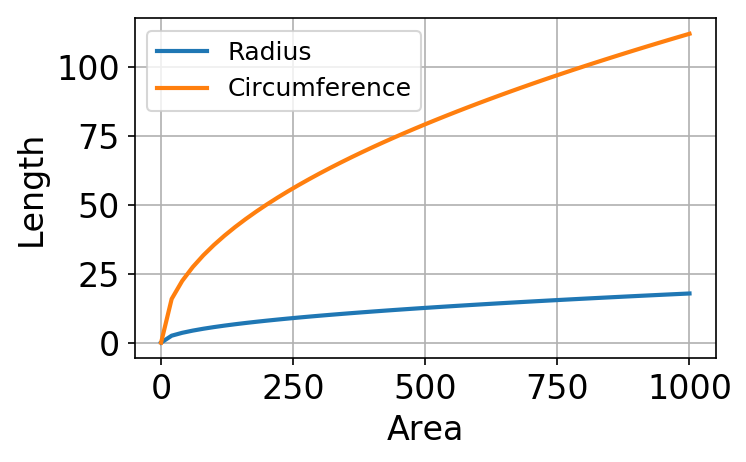

In [100]:
#plt.figure(figsize = [6,4])
plt.plot(areas, r, label = 'Radius')
plt.plot(areas, C, label = 'Circumference')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xlabel('Area')
plt.ylabel('Length')
plt.grid()
#plt.axis('equal') # this did not help

## 2. TED Talk exercises

For the following, use the TED Talk dataset we used in week 5

In [83]:
# first load in the dataset (see Lecutre 5.2)
ted = pd.read_csv('ted.txt')

### 2.1 Basics
How do you display all of the data types in a pandas data set? Demonstrate.

In [86]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

### 2.2 Working with data in pandas: sorting and plotting
#### 2.2.1 
Display just the name and duration of the talks.

In [174]:
ted[['name','duration']]

,name,duration
0,Ken Robinson: Do schools kill creativity?,1164
1,Al Gore: Averting the climate crisis,977
2,David Pogue: Simplicity sells,1286
3,Majora Carter: Greening the ghetto,1116
4,Hans Rosling: The best stats you've ever seen,1190
5,Tony Robbins: Why we do what we do,1305
6,Julia Sweeney: Letting go of God,992
7,Joshua Prince-Ramus: Behind the design of Seat...,1198
8,Dan Dennett: Let's teach religion -- all relig...,1485
9,Rick Warren: A life of purpose,1262


#### 2.2.2
Now sort by duration. Display 1) the 10 shortest and 2) the 10 longest talks

In [91]:
# the ten shortest
ted[['name','duration']].sort_values('duration').head(10) # note the 10 inside the head statement

,name,duration
239,Murray Gell-Mann: The ancestor of language,135
248,"Nellie McKay: ""Clonie""",140
547,Matthew White: The modern euphonium,141
454,Yves Behar: A supercharged motorcycle design,143
264,Marisa Fick-Jordan: The wonder of Zulu wire art,153
606,"Derek Sivers: Weird, or just different?",162
86,"Jill Sobule: Global warming's theme song, ""Man...",163
1390,"Paolo Cardini: Forget multitasking, try monota...",172
593,Lalitesh Katragadda: Making maps to fight disa...,174
722,"Mitchell Joachim: Don't build your home, grow it!",176


In [92]:
# the ten longest
ted[['name','duration']].sort_values('duration').tail(10)

,name,duration
202,Frank Gehry: My days as a young rebel,2678
947,Malcolm McLaren: Authentic creativity vs. kara...,2761
2421,"Gretchen Carlson, David Brooks: Political comm...",2853
580,Michael Sandel: What's the right thing to do?,3296
600,Richard Dawkins: Growing up in the universe,3475
594,Edwidge Danticat: Stories of Haiti,3573
2387,Yuval Noah Harari: Nationalism vs. globalism: ...,3608
629,Richard Feynman: Physics is fun to imagine,3955
588,Randy Pausch: Really achieving your childhood ...,4587
640,"Douglas Adams: Parrots, the universe and every...",5256


#### 2.2.3
What is the 10th longest talk?

Frank Gehry: My days as a young rebel
at 2678

#### 2.2.4
What unit of time is the duration in? How do you know?

In [93]:
60*44

2640

Googling the Frank Gehry talk, it is over 44 min long, which is 2640 s, so the units must be seconds
Some of the talks are very short!

#### 2.2.5
Plot the durations as a histogram, using a sensible number of bins. Label your axes. How did you decide how many bins to use?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e24668>]],
      dtype=object)

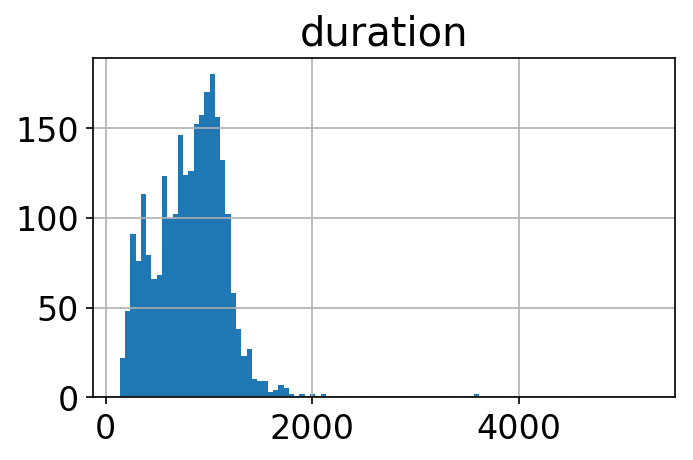

In [124]:
ted[['name','duration']].sort_values('duration').hist(bins = 100)
# this is too many bins, looks too patchy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121413a90>]],
      dtype=object)

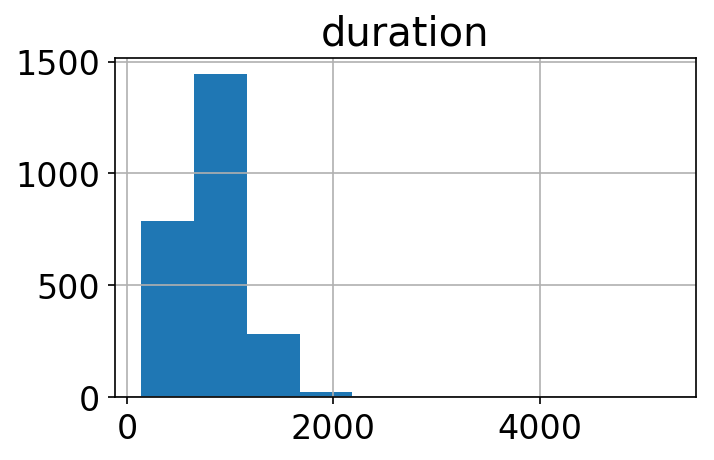

In [102]:
ted[['name','duration']].sort_values('duration').hist(bins = 10)
# this is too few bins, no detail

Text(0, 0.5, 'N')

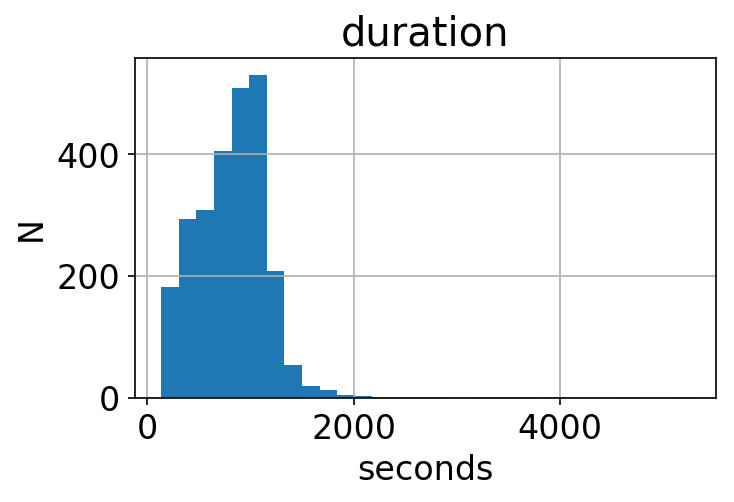

In [108]:
ted[['name','duration']].sort_values('duration').hist(bins = 30)
# looks good, I can see the shape of the data without it looking too patchy
plt.xlabel('seconds')
plt.ylabel('N')

#### 2.2.6
Now plot as a box plot. Explain what the box plot is showing: what is the box, what is the line in the middle, what are the dots?

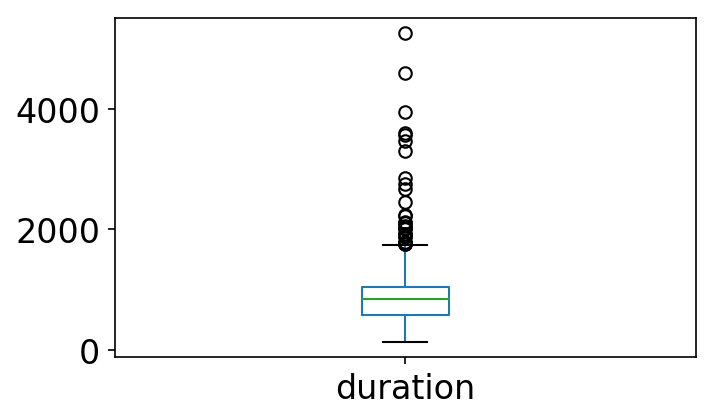

In [111]:
ted[['name','duration']].sort_values('duration').plot(kind = 'box')
# the line in the middle is the median, the 50% quartile, where 50% of the data is above and below this 
# the box are the quartiles, the levels at which 25% and 75% of the data are above
# the dots are the outliers, which are determined by some algorithym (these can be suppressed)
# the median is around 1000, a little less

#### 2.2.7
Find the median, mean, mode and standard deviation of the durations. Are these consistent with your plots above? Explain.

In [112]:
ted[['name','duration']].sort_values('duration').mean()

duration    826.510196
dtype: float64

In [113]:
ted[['name','duration']].sort_values('duration').median()

duration    848.0
dtype: float64

Yes, the median is consistent with the box plot above

In [137]:
ted['duration'].mode()

0     848
1    1099
dtype: int64

In [141]:
ted[['name','duration']].sort_values('duration').mode()
# hmmm, looks like the mode is seeing all the nans (fixed below)

,name,duration
0,AJ Jacobs: How healthy living nearly killed me,848.0
1,AJ Jacobs: My year of living biblically,1099.0
2,AJ Jacobs: The world's largest family reunion ...,NaN
3,Aakash Odedra: A dance in a hurricane of paper...,NaN
4,Aala El-Khani: What it's like to be a parent i...,NaN
5,Aaron Huey: America's native prisoners of war,NaN
6,Aaron Koblin: Visualizing ourselves ... with c...,NaN
7,Aaron O'Connell: Making sense of a visible qua...,NaN
8,Abe Davis: New video technology that reveals a...,NaN
9,"Abha Dawesar: Life in the ""digital now""",NaN


In [140]:
ted[['name','duration']].sort_values('duration').mode(numeric_only=True)
# hmmm, looks like the mode is seeing all the nans, here is the fix

,duration
0,848
1,1099


Honestly I'm not sure if the mode is working...hmmmm

#### 2.2.8
Is this a normal distribution? Explain. How does this affect your analysis above?

This is not a normal distribution, it is skewed toward lower values, but only somewhat, with many outliers on the longer talk range. However, this does not seem to affect the descriptive stats, as the median and the mean are quite similar and the quartiles are pretty symmetric.

#### 2.3.1-4

Going back to the tutorial, make sure you have created the film_datetime variable

In the command:

ted.film_datetime.dt.year.value_counts().sort_index()

What do the dt, year, value_counts and sort_index commands do? Explain each one and demonstrate

In [143]:
ted['film_datetime']= pd.to_datetime(ted.film_date, unit = 's')

In [144]:
ted.dtypes # yep it's there now

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
film_datetime         datetime64[ns]
dtype: object

Let's go through all the commands one by one

In [151]:
ted.film_datetime.head() # head by itself gives the first 5 values
# this gives you all the dates of the talks

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_datetime, dtype: datetime64[ns]

In [153]:
ted.film_datetime.dt.year.head() 
# the .dt is using the datetime package commands (like np.sin, etc.)
# the .dt.year is giving just the year

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [155]:
ted.film_datetime.dt.year.value_counts()
# the value counts is counting the number of talks in each year, like a histogram

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

In [157]:
ted.film_datetime.dt.year.value_counts().sort_index()
# the sort_index sorts the counts by year

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: film_datetime, dtype: int64

#### 2.3.5 
Why does the data need to be manipulated this way to plot it?
What was the research question?

The reasearch question was how many TED talks were there each year.

The value counds gives us the binning by year, and the sorthing puts it in order. The plot doesn't look right without this, it connects the data by the number of talks instead of years

#### 2.3.6 
Make the plot and label your axes

Text(0, 0.5, 'Number of talks')

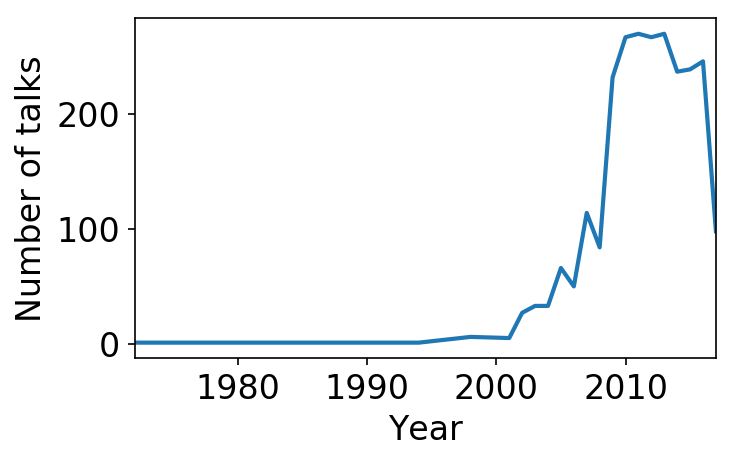

In [159]:
ted.film_datetime.dt.year.value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Number of talks')

Bonus: could you make a similar plot and get the same information?

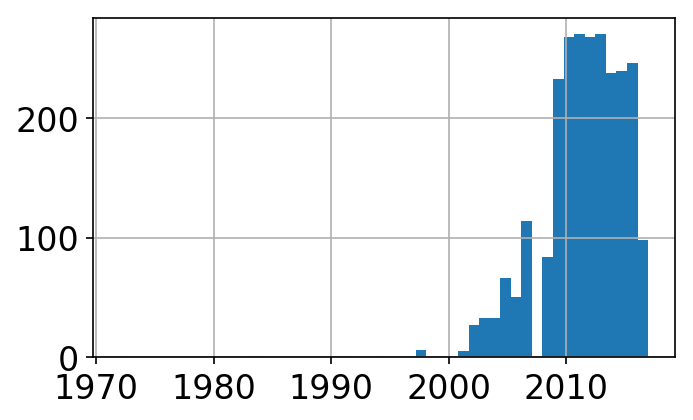

In [168]:
ted.film_datetime.dt.year.hist(bins = 50) # that was so much easier

#### 2.3.2
Research another way to use the pandas datatime data to analyse the Ted Talks. Explain your methods

In [164]:
# let's sort by month
ted.film_datetime.dt.month.value_counts().sort_index()

1      33
2     601
3     397
4     173
5     123
6     270
7     253
8      30
9     107
10    208
11    232
12    123
Name: film_datetime, dtype: int64

Text(0, 0.5, 'Number of talks')

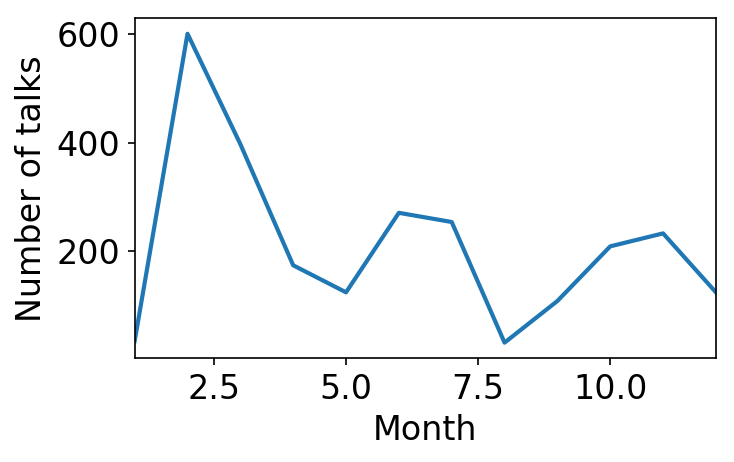

In [161]:
# plot by number of months
ted.film_datetime.dt.month.value_counts().sort_index().plot()
plt.xlabel('Month')
plt.ylabel('Number of talks')

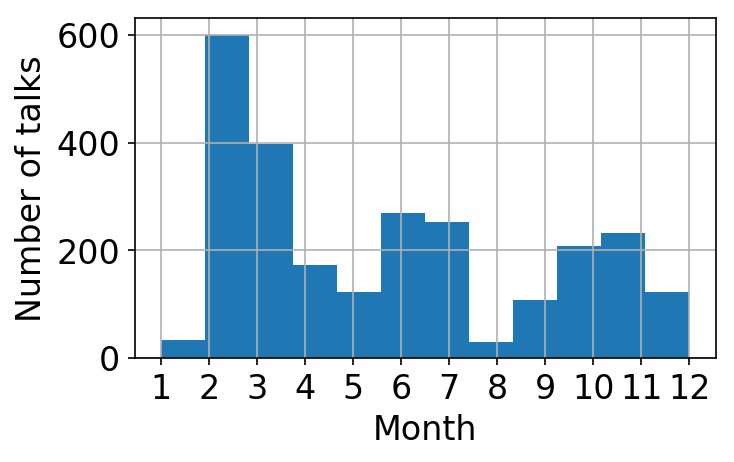

In [176]:
# plot by number of months
ted.film_datetime.dt.month.hist(bins = 12) # note here I am defining the bin edges, see
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
plt.xlabel('Month')
plt.ylabel('Number of talks')
plt.xticks(np.arange(1,13));

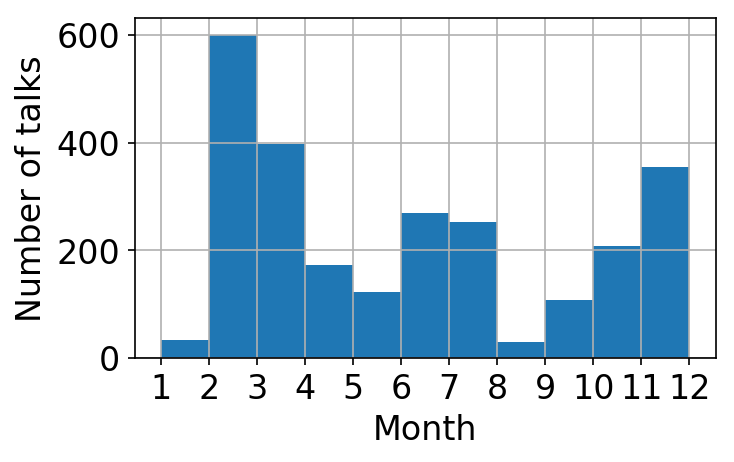

In [173]:
# plot by number of months
ted.film_datetime.dt.month.hist(bins = np.arange(1,13)) # note here I am defining the bin edges, see
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
plt.xlabel('Month')
plt.ylabel('Number of talks')
plt.xticks(np.arange(1,13));

#### 2.3.3
Get creative! Now it is time for you to do some analysis on your own using the TED Talks dataset. Find a few ineresting ways to analyse this data set, which you will present to the class on Thursday.

## 3. More PANDAS (if time)

Review the following PANDAS for ecology tutorial and pick a few topics to work on:

https://datacarpentry.org/python-ecology-lesson/

Explain your methods in words and comment your code.

#### Note the above is a good reference for basic pandas operations.

